In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('allwine.csv')

In [3]:
df.drop(columns='Unnamed: 0',inplace=True)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.743787,0.805266,-1.455948,-0.541531,-0.334525,-0.539436,-0.978159,0.146723,-0.755850,-1.297136,0
1,-0.520914,1.798500,-1.455948,-0.047918,0.129345,0.787432,-0.998211,-1.220838,-0.062351,-0.960761,0
2,-0.520914,1.136344,-1.251203,-0.259467,0.002835,-0.160331,-0.994200,-0.956148,-0.235726,-0.960761,0
3,1.373509,-1.512280,1.410480,-0.541531,-0.355610,0.029222,-0.974148,-1.397297,-0.640267,-0.960761,1
4,-0.743787,0.805266,-1.455948,-0.541531,-0.334525,-0.539436,-0.978159,0.146723,-0.755850,-1.297136,0


In [5]:
df.shape

(3198, 11)

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3198.000000
mean,-3.732682e-16,-3.643809e-16,1.688594e-16,5.332403e-17,-1.777468e-16,-6.221137e-17,-1.848566e-15,2.132961e-16,-3.377189e-16,-3.554936e-17,0.534709
std,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,0.498872
min,-2.303900e+00,-2.395155e+00,-1.623825e+00,-1.246692e+00,-1.683967e+00,-1.487200e+00,-1.133162e+00,-3.250120e+00,-2.085055e+00,-2.138075e+00,0.000000
25%,-6.880688e-01,-7.413923e-01,-9.041204e-01,-4.710149e-01,-3.766953e-01,-7.930922e-01,-9.992135e-01,-7.796891e-01,-6.402666e-01,-7.137768e-01,0.000000
50%,-1.883037e-01,-3.776619e-02,-6.651164e-02,-2.594666e-01,-1.744349e-01,-2.140109e-01,-7.166201e-04,-2.683110e-03,-1.977143e-01,-1.262511e-01,1.000000
75%,5.638545e-01,6.221545e-01,7.962457e-01,6.705718e-02,8.597896e-02,5.481191e-01,9.990931e-01,7.564772e-01,4.338530e-01,6.383188e-01,1.000000
max,4.580738e+00,5.932391e+00,3.824068e+00,9.138676e+00,1.115258e+01,5.245422e+00,1.140202e+00,3.769595e+00,7.944553e+00,4.311531e+00,1.000000


In [7]:
df.quality.value_counts()

quality
1    1710
0    1488
Name: count, dtype: int64

In [8]:
df[df.duplicated()].shape

(241, 11)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(2957, 11)

In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.743787,0.805266,-1.455948,-0.541531,-0.334525,-0.539436,-0.978159,0.146723,-0.755850,-1.297136,0
1,-0.520914,1.798500,-1.455948,-0.047918,0.129345,0.787432,-0.998211,-1.220838,-0.062351,-0.960761,0
2,-0.520914,1.136344,-1.251203,-0.259467,0.002835,-0.160331,-0.994200,-0.956148,-0.235726,-0.960761,0
3,1.373509,-1.512280,1.410480,-0.541531,-0.355610,0.029222,-0.974148,-1.397297,-0.640267,-0.960761,1
4,-0.743787,0.584547,-1.455948,-0.612047,-0.355610,-0.349884,-0.978159,0.146723,-0.755850,-1.297136,0


In [13]:
df.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [14]:
x=np.array(df.iloc[:,:-1])
y=np.array(df.quality)
x.shape,y.shape

((2957, 10), (2957,))

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((2365, 10), (2365,), (592, 10), (592,))

## Task 1 - Simple Logistic Regression Model

In [16]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [17]:
#Get number of features
n_features = xtrain.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, xtrain, ytrain, learning_rate=0.0001,no_iterations=10000)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,xtrain.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,xtest.T)+b)
#
m_tr =  xtrain.shape[0]
m_ts =  xtest.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, ytrain))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, ytest))

Number of Features 10
Optimized weights [[ 0.03131547 -0.12741976  0.05286512 -0.00993815 -0.05260087 -0.02893097
  -0.01059829 -0.00159833  0.08813113  0.1733874 ]]
Optimized intercept 0.028634675433281506
Training Accuracy 0.7116279069767442
Test Accuracy 0.706081081081081


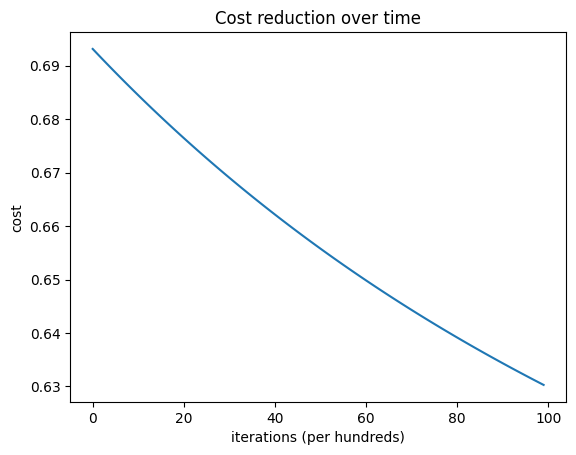

In [18]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [19]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [20]:
clf=LogisticRegression()
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
ypred_tr=clf.predict(xtrain)
accuracy_score(ypred_tr,ytrain),accuracy_score(ypred,ytest)

(0.7116279069767442, 0.706081081081081)

## Task 2- Simple Deep Ensemble Logistic Regression Model

In [26]:
class EnsembleLogisticRegression:
    def __init__(self, lr_middle=0.1, lr_left=0.1, lr_right=0.1, n_iters=1000):
        self.lr_middle = lr_middle
        self.lr_left = lr_left
        self.lr_right = lr_right
        self.lr_bias = 0.01
        self.n_iters = n_iters
        self.theta_M = None
        self.theta_L = None
        self.theta_R = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def cost(self,predictions_M, predictions_L, predictions_R, y):
        pred = ((predictions_L**y)*((1-predictions_L)**(1-y))*predictions_M)+((predictions_R**y)*((1-predictions_R)**(1-y))*(1-predictions_M))
        cost = -np.log(pred)
        return cost

    def derivative(self,X,predictions_M,predictions_L,predictions_R,y):
        h=0.00001
        linear_pred_M = np.dot(X, self.theta_M)+self.bias
        predictions_M = self.sigmoid(linear_pred_M)
        linear_pred_L = np.dot(X, self.theta_L)+self.bias
        predictions_L = self.sigmoid(linear_pred_L)
        linear_pred_R = np.dot(X, self.theta_R)+self.bias
        predictions_R = self.sigmoid(linear_pred_R)
        dw_M =(self.cost(predictions_M+h,predictions_L,predictions_R,y)-self.cost(predictions_M-h,predictions_L,predictions_R,y))/(2*h)
        dw_L=(self.cost(predictions_M,predictions_L+h,predictions_R,y)-self.cost(predictions_M,predictions_L-h,predictions_R,y))/(2*h)
        dw_R=(self.cost(predictions_M,predictions_L,predictions_R+h,y)-self.cost(predictions_M,predictions_L,predictions_R-h,y))/(2*h)
        
        linear_pred_M1 = np.dot(X, self.theta_M)+self.bias+h
        predictions_M1 = self.sigmoid(linear_pred_M1)
        linear_pred_L1 = np.dot(X, self.theta_L)+self.bias+h
        predictions_L1 = self.sigmoid(linear_pred_L1)
        linear_pred_R1 = np.dot(X, self.theta_R)+self.bias+h
        predictions_R1 = self.sigmoid(linear_pred_R1)
        linear_pred_M2 = np.dot(X, self.theta_M)+self.bias-h
        predictions_M2 = self.sigmoid(linear_pred_M2)
        linear_pred_L2 = np.dot(X, self.theta_L)+self.bias-h
        predictions_L2 = self.sigmoid(linear_pred_L2)
        linear_pred_R2 = np.dot(X, self.theta_R)+self.bias-h
        predictions_R2 = self.sigmoid(linear_pred_R2)
        dw_B = (self.cost(predictions_M1,predictions_L1,predictions_R1,y)-self.cost(predictions_M2,predictions_L2,predictions_R2,y))/(2*h)
        return dw_M,dw_L,dw_R,dw_B
        
    def fit(self, X, y):
        costs=[]
        n_samples, n_features = X.shape
        np.random.seed(16) #or seed 16
        self.theta_M = np.random.random(size=n_features)
        self.theta_L = np.random.random(size=n_features)
        self.theta_R = np.random.random(size=n_features)
        self.bias = np.random.random()
        # self.theta_M =np.zeros(n_features)
        # self.theta_L = np.zeros(n_features)
        # self.theta_R = np.zeros(n_features)
        # self.bias = 0

        for _ in range(self.n_iters):
            # print(self.theta_M)
            linear_pred_M = np.dot(X, self.theta_M)+self.bias
            predictions_M = self.sigmoid(linear_pred_M)

            linear_pred_L = np.dot(X, self.theta_L)+self.bias
            predictions_L = self.sigmoid(linear_pred_L)

            linear_pred_R = np.dot(X, self.theta_R)+self.bias
            predictions_R = self.sigmoid(linear_pred_R)

            # Optimizing Weights
            dw_M,dw_L,dw_R,dw_B = self.derivative(X,predictions_M,predictions_L,predictions_R,y)
            dw_M = (1 / n_samples) *np.dot(X.T,dw_M-y)
            dw_L = (1 / n_samples) *np.dot(X.T,dw_L-y)
            dw_R = (1 / n_samples) *np.dot(X.T,dw_R-y)
            dw_B = (1 / n_samples) *np.sum(dw_B)
            # dw_M = (1 / n_samples) * np.dot(X.T, (predictions_M - y))
            self.theta_M -= self.lr_middle * dw_M
            # print(self.theta_M)
            # dw_L = (1 / n_samples) * np.dot(X.T, (predictions_L - y))
            self.theta_L -= self.lr_left * dw_L

            # dw_R = (1 / n_samples) * np.dot(X.T, (predictions_R - y))
            self.theta_R -= self.lr_right * dw_R
            self.bias -= self.lr_bias * dw_B

            
    def predict_proba(self, X,y):
        linear_pred_M = np.dot(X, self.theta_M)+self.bias
        predictions_M = self.sigmoid(linear_pred_M)

        linear_pred_L = np.dot(X, self.theta_L)+self.bias
        predictions_L = self.sigmoid(linear_pred_L)

        linear_pred_R = np.dot(X, self.theta_R)+self.bias
        predictions_R = self.sigmoid(linear_pred_R)
        # Calculate overall probability
        prob_left = (predictions_L * predictions_M) + (predictions_R * (1 - predictions_M))
        prob_right = ((1 - predictions_L) * predictions_M) + (1 - predictions_R) * (1 - predictions_M)
        return np.column_stack((prob_left, prob_right))
        # return ((predictions_L**y)*((1-predictions_L)**(1-y))*predictions_M)+((predictions_R**y)*((1-predictions_R)**(1-y))*(1-predictions_M))

    def predict(self, X,y, threshold=0.5):
        proba = self.predict_proba(X,y)
        return np.where(proba[:, 0] >= threshold, 1, 0)
        # return np.where(proba >= threshold, 1, 0)

x=np.array(df.iloc[:,:-1])
y=np.array(df.quality)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
model = EnsembleLogisticRegression()
model.fit(xtrain, ytrain)

# Make predictions on the test set
predictions = model.predict(xtest,ytest)
accuracy_score(model.predict(xtrain,ytrain),ytrain),accuracy_score(predictions, ytest)

(0.7340380549682876, 0.7195945945945946)

In [22]:
model.theta_M,model.theta_L,model.theta_R,model.bias

(array([  2.63914998, -12.87548053,   5.4835912 ,  -3.89547612,
         -3.7622651 ,  -3.24230959,   1.0629398 ,   0.81829103,
         12.50290678,  19.95213984]),
 array([ 0.08232373, -0.98126606, -0.21628508, -0.81375818, -0.24252863,
        -0.31108762, -0.17275682, -0.3404701 ,  0.51912979,  1.37730277]),
 array([ 0.23028431, -0.65239422, -0.47634576,  0.08472239, -0.30476836,
        -0.3125228 , -0.53343674, -0.27977719,  1.0124275 ,  1.67488851]),
 0.2544785883252251)

In [23]:
# for i in range(0,100):
#     class EnsembleLogisticRegression:
#         def __init__(self, lr_middle=0.1, lr_left=0.1, lr_right=0.1, n_iters=1000):
#             self.lr_middle = lr_middle
#             self.lr_left = lr_left
#             self.lr_right = lr_right
#             self.lr_bias = 0.01
#             self.n_iters = n_iters
#             self.theta_M = None
#             self.theta_L = None
#             self.theta_R = None
#             self.bias = None
    
#         def sigmoid(self, x):
#             return 1 / (1 + np.exp(-x))
    
#         def cost(self,predictions_M, predictions_L, predictions_R, y):
#             pred = ((predictions_L**y)*((1-predictions_L)**(1-y))*predictions_M)+((predictions_R**y)*((1-predictions_R)**(1-y))*(1-predictions_M))
#             cost = -np.log(pred)
#             return cost
    
#         def derivative(self,X,predictions_M,predictions_L,predictions_R,y):
#             h=0.00001
#             linear_pred_M = np.dot(X, self.theta_M)+self.bias
#             predictions_M = self.sigmoid(linear_pred_M)
#             linear_pred_L = np.dot(X, self.theta_L)+self.bias
#             predictions_L = self.sigmoid(linear_pred_L)
#             linear_pred_R = np.dot(X, self.theta_R)+self.bias
#             predictions_R = self.sigmoid(linear_pred_R)
#             dw_M =(self.cost(predictions_M+h,predictions_L,predictions_R,y)-self.cost(predictions_M-h,predictions_L,predictions_R,y))/(2*h)
#             dw_L=(self.cost(predictions_M,predictions_L+h,predictions_R,y)-self.cost(predictions_M,predictions_L-h,predictions_R,y))/(2*h)
#             dw_R=(self.cost(predictions_M,predictions_L,predictions_R+h,y)-self.cost(predictions_M,predictions_L,predictions_R-h,y))/(2*h)
            
#             linear_pred_M1 = np.dot(X, self.theta_M)+self.bias+h
#             predictions_M1 = self.sigmoid(linear_pred_M1)
#             linear_pred_L1 = np.dot(X, self.theta_L)+self.bias+h
#             predictions_L1 = self.sigmoid(linear_pred_L1)
#             linear_pred_R1 = np.dot(X, self.theta_R)+self.bias+h
#             predictions_R1 = self.sigmoid(linear_pred_R1)
#             linear_pred_M2 = np.dot(X, self.theta_M)+self.bias-h
#             predictions_M2 = self.sigmoid(linear_pred_M2)
#             linear_pred_L2 = np.dot(X, self.theta_L)+self.bias-h
#             predictions_L2 = self.sigmoid(linear_pred_L2)
#             linear_pred_R2 = np.dot(X, self.theta_R)+self.bias-h
#             predictions_R2 = self.sigmoid(linear_pred_R2)
#             dw_B = (self.cost(predictions_M1,predictions_L1,predictions_R1,y)-self.cost(predictions_M2,predictions_L2,predictions_R2,y))/(2*h)
#             return dw_M,dw_L,dw_R,dw_B
            
#         def fit(self, X, y):
#             costs=[]
#             n_samples, n_features = X.shape
#             np.random.seed(i)
#             self.theta_M = np.random.random(size=n_features)
#             self.theta_L = np.random.random(size=n_features)
#             self.theta_R = np.random.random(size=n_features)
#             self.bias = np.random.random()
#             # self.theta_M =np.zeros(n_features)
#             # self.theta_L = np.zeros(n_features)
#             # self.theta_R = np.zeros(n_features)
#             # self.bias = 0
    
#             for _ in range(self.n_iters):
#                 # print(self.theta_M)
#                 linear_pred_M = np.dot(X, self.theta_M)+self.bias
#                 predictions_M = self.sigmoid(linear_pred_M)
    
#                 linear_pred_L = np.dot(X, self.theta_L)+self.bias
#                 predictions_L = self.sigmoid(linear_pred_L)
    
#                 linear_pred_R = np.dot(X, self.theta_R)+self.bias
#                 predictions_R = self.sigmoid(linear_pred_R)
    
#                 # Optimizing Weights
#                 dw_M,dw_L,dw_R,dw_B = self.derivative(X,predictions_M,predictions_L,predictions_R,y)
#                 dw_M = (1 / n_samples) *np.dot(X.T,dw_M-y)
#                 dw_L = (1 / n_samples) *np.dot(X.T,dw_L-y)
#                 dw_R = (1 / n_samples) *np.dot(X.T,dw_R-y)
#                 dw_B = (1 / n_samples) *np.sum(dw_B)
#                 # dw_M = (1 / n_samples) * np.dot(X.T, (predictions_M - y))
#                 self.theta_M -= self.lr_middle * dw_M
#                 # print(self.theta_M)
#                 # dw_L = (1 / n_samples) * np.dot(X.T, (predictions_L - y))
#                 self.theta_L -= self.lr_left * dw_L
    
#                 # dw_R = (1 / n_samples) * np.dot(X.T, (predictions_R - y))
#                 self.theta_R -= self.lr_right * dw_R
#                 self.bias -= self.lr_bias * dw_B
    
                
#         def predict_proba(self, X,y):
#             linear_pred_M = np.dot(X, self.theta_M)+self.bias
#             predictions_M = self.sigmoid(linear_pred_M)
    
#             linear_pred_L = np.dot(X, self.theta_L)+self.bias
#             predictions_L = self.sigmoid(linear_pred_L)
    
#             linear_pred_R = np.dot(X, self.theta_R)+self.bias
#             predictions_R = self.sigmoid(linear_pred_R)
#             # Calculate overall probability
#             prob_left = (predictions_L * predictions_M) + (predictions_R * (1 - predictions_M))
#             prob_right = ((1 - predictions_L) * predictions_M) + (1 - predictions_R) * (1 - predictions_M)
#             return np.column_stack((prob_left, prob_right))
#             # return ((predictions_L**y)*((1-predictions_L)**(1-y))*predictions_M)+((predictions_R**y)*((1-predictions_R)**(1-y))*(1-predictions_M))
    
#         def predict(self, X,y, threshold=0.5):
#             proba = self.predict_proba(X,y)
#             return np.where(proba[:, 0] >= threshold, 1, 0)
#             # return np.where(proba >= threshold, 1, 0)
    
#     x=np.array(df.iloc[:,:-1])
#     y=np.array(df.quality)
#     xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
#     model = EnsembleLogisticRegression()
#     model.fit(xtrain, ytrain)
    
#     # Make predictions on the test set
#     predictions = model.predict(xtest,ytest)
#     if accuracy_score(model.predict(xtrain,ytrain),ytrain) > 0.7:
#         print(i,accuracy_score(model.predict(xtrain,ytrain),ytrain),accuracy_score(predictions, ytest))

## Task 3- 3 Layer Ensemble Model

In [37]:
class EnsembleLogisticRegression:
    def __init__(self, lr_middle=0.1, lr_left=0.1, lr_right=0.1, n_iters=1000):
        self.lr_middle = lr_middle
        self.lr_left = lr_left
        self.lr_right = lr_right
        self.lr_bias = 0.01
        self.n_iters = n_iters
        self.theta_M = None
        self.theta_L = None
        self.theta_R = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def cost(self,predictions_M, predictions_L, predictions_R,predictions_LL,predictions_RL,predictions_LR,predictions_RR, y):
        # pred = (((predictions_LL**y)*(predictions_LR**(1-y))*(predictions_L**y)*((1-predictions_L)**(1-y))*predictions_M)+
        #             ((predictions_RL**y)*(predictions_RR**(1-y))*(predictions_R**y)*((1-predictions_R)**(1-y))*(1-predictions_M)))
        pred  = (predictions_LL**y * (pe)**(1-y) * (predictions_L**y)*((1-predictions_L)**(1-y))*predictions_M +
                 ((predictions_RR**y)*(1-predictions_RL**(1-y))*(predictions_R**y)*((1-predictions_R)**(1-y))*(1-predictions_M)))
        cost = -np.log(pred)
        return cost

    def derivative(self,X,y):
        h=0.00001
        linear_pred_M = np.dot(X, self.theta_M)+self.bias
        predictions_M = self.sigmoid(linear_pred_M)
        linear_pred_L = np.dot(X, self.theta_L)+self.bias
        predictions_L = self.sigmoid(linear_pred_L)
        linear_pred_R = np.dot(X, self.theta_R)+self.bias
        predictions_R = self.sigmoid(linear_pred_R)
        linear_pred_LL = np.dot(X, self.theta_LL)+self.bias
        predictions_LL = self.sigmoid(linear_pred_LL)
        linear_pred_RL = np.dot(X, self.theta_RL)+self.bias
        predictions_RL = self.sigmoid(linear_pred_RL)
        linear_pred_LR = np.dot(X, self.theta_LR)+self.bias
        predictions_LR = self.sigmoid(linear_pred_LR)
        linear_pred_RR = np.dot(X, self.theta_RR)+self.bias
        predictions_RR = self.sigmoid(linear_pred_RR)
        dw_M =(self.cost(predictions_M+h,predictions_L,predictions_R,predictions_LL,predictions_RL,predictions_LR,predictions_RR,y)-
               self.cost(predictions_M-h,predictions_L,predictions_R,predictions_LL,predictions_RL,predictions_LR,predictions_RR,y))/(2*h)
        dw_L=(self.cost(predictions_M,predictions_L+h,predictions_R,predictions_LL,predictions_RL,predictions_LR,predictions_RR,y)-
              self.cost(predictions_M,predictions_L-h,predictions_R,predictions_LL,predictions_RL,predictions_LR,predictions_RR,y))/(2*h)
        dw_R=(self.cost(predictions_M,predictions_L,predictions_R+h,predictions_LL,predictions_RL,predictions_LR,predictions_RR,y)-
              self.cost(predictions_M,predictions_L,predictions_R-h,predictions_LL,predictions_RL,predictions_LR,predictions_RR,y))/(2*h)
        dw_LL=(self.cost(predictions_M,predictions_L,predictions_R,predictions_LL+h,predictions_RL,predictions_LR,predictions_RR,y)-
               self.cost(predictions_M,predictions_L,predictions_R,predictions_LL-h,predictions_RL,predictions_LR,predictions_RR,y))/(2*h)
        dw_RL=(self.cost(predictions_M,predictions_L,predictions_R,predictions_LL,predictions_RL+h,predictions_LR,predictions_RR,y)-
               self.cost(predictions_M,predictions_L,predictions_R,predictions_LL,predictions_RL-h,predictions_LR,predictions_RR,y))/(2*h)
        dw_LR=(self.cost(predictions_M,predictions_L,predictions_R,predictions_LL,predictions_RL,predictions_LR+h,predictions_RR,y)-
               self.cost(predictions_M,predictions_L,predictions_R,predictions_LL,predictions_RL,predictions_LR-h,predictions_RR,y))/(2*h)
        dw_RR=(self.cost(predictions_M,predictions_L,predictions_R,predictions_LL,predictions_RL,predictions_LR,predictions_RR+h,y)-
               self.cost(predictions_M,predictions_L,predictions_R,predictions_LL,predictions_RL,predictions_LR,predictions_RR-h,y))/(2*h)
        
        #bias
        linear_pred_M1 = np.dot(X, self.theta_M)+self.bias+h
        predictions_M1 = self.sigmoid(linear_pred_M1)
        linear_pred_L1 = np.dot(X, self.theta_L)+self.bias+h
        predictions_L1 = self.sigmoid(linear_pred_L1)
        linear_pred_R1 = np.dot(X, self.theta_R)+self.bias+h
        predictions_R1 = self.sigmoid(linear_pred_R1)
        linear_pred_LL1 = np.dot(X, self.theta_LL)+self.bias+h
        predictions_LL1 = self.sigmoid(linear_pred_LL1)
        linear_pred_RL1 = np.dot(X, self.theta_RL)+self.bias+h
        predictions_RL1 = self.sigmoid(linear_pred_RL1)
        linear_pred_LR1 = np.dot(X, self.theta_LR)+self.bias+h
        predictions_LR1 = self.sigmoid(linear_pred_LR1)
        linear_pred_RR1 = np.dot(X, self.theta_RR)+self.bias+h
        predictions_RR1 = self.sigmoid(linear_pred_RR1)
        
        linear_pred_M2 = np.dot(X, self.theta_M)+self.bias-h
        predictions_M2 = self.sigmoid(linear_pred_M2)
        linear_pred_L2 = np.dot(X, self.theta_L)+self.bias-h
        predictions_L2 = self.sigmoid(linear_pred_L2)
        linear_pred_R2 = np.dot(X, self.theta_R)+self.bias-h
        predictions_R2 = self.sigmoid(linear_pred_R2)
        linear_pred_LL2 = np.dot(X, self.theta_LL)+self.bias-h
        predictions_LL2 = self.sigmoid(linear_pred_LL2)
        linear_pred_RL2 = np.dot(X, self.theta_RL)+self.bias-h
        predictions_RL2 = self.sigmoid(linear_pred_RL2)
        linear_pred_LR2 = np.dot(X, self.theta_LR)+self.bias-h
        predictions_LR2 = self.sigmoid(linear_pred_LR2)
        linear_pred_RR2 = np.dot(X, self.theta_RR)+self.bias-h
        predictions_RR2 = self.sigmoid(linear_pred_RR2)
        
        dw_B = (self.cost(predictions_M1,predictions_L1,predictions_R1,predictions_LL1,predictions_LR1,predictions_LR1,predictions_RR1,y)-
                self.cost(predictions_M2,predictions_L2,predictions_R2,predictions_LL2,predictions_LR2,predictions_LR2,predictions_RR2,y))/(2*h)
        return dw_M,dw_L,dw_R,dw_LL,dw_RL,dw_LR,dw_RR,dw_B
        
    def fit(self, X, y):
        costs=[]
        n_samples, n_features = X.shape
        np.random.seed(2)
        # self.theta_M = np.random.random(size=n_features)
        # self.theta_L = np.random.random(size=n_features)
        # self.theta_R = np.random.random(size=n_features)
        # self.theta_LL = np.random.random(size=n_features)
        # self.theta_RL = np.random.random(size=n_features)
        # self.theta_LR = np.random.random(size=n_features)
        # self.theta_RR = np.random.random(size=n_features)
        # self.bias = np.random.random()
        self.theta_M =np.zeros(n_features)
        self.theta_L = np.zeros(n_features)
        self.theta_R = np.zeros(n_features)
        self.theta_LL = np.zeros(n_features)
        self.theta_RL = np.zeros(n_features)
        self.theta_LR = np.zeros(n_features)
        self.theta_RR = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            # print(self.theta_M)
            linear_pred_M = np.dot(X, self.theta_M)+self.bias
            predictions_M = self.sigmoid(linear_pred_M)

            linear_pred_L = np.dot(X, self.theta_L)+self.bias
            predictions_L = self.sigmoid(linear_pred_L)

            linear_pred_R = np.dot(X, self.theta_R)+self.bias
            predictions_R = self.sigmoid(linear_pred_R)

            linear_pred_LL = np.dot(X, self.theta_LL)
            predictions_LL = self.sigmoid(linear_pred_LL)

            linear_pred_LR = np.dot(X, self.theta_LR)
            predictions_L = self.sigmoid(linear_pred_LR)

            linear_pred_RL = np.dot(X, self.theta_RL)
            predictions_RL = self.sigmoid(linear_pred_RL)

            linear_pred_RR = np.dot(X, self.theta_RR)
            predictions_RR = self.sigmoid(linear_pred_RR)

            # Optimizing Weights
            dw_M,dw_L,dw_R,dw_LL,dw_RL,dw_LR,dw_RR,dw_B = self.derivative(X,y)
            dw_M = (1 / n_samples) *np.dot(X.T,dw_M-y)
            dw_L = (1 / n_samples) *np.dot(X.T,dw_L-y)
            dw_R = (1 / n_samples) *np.dot(X.T,dw_R-y)
            dw_LL = (1 / n_samples) *np.dot(X.T,dw_LL-y)
            dw_RL = (1 / n_samples) *np.dot(X.T,dw_RL-y)
            dw_LR = (1 / n_samples) *np.dot(X.T,dw_LR-y)
            dw_RR = (1 / n_samples) *np.dot(X.T,dw_RR-y)
            dw_B = (1 / n_samples) *np.sum(dw_B)
            
            self.theta_M -= self.lr_middle * dw_M
            self.theta_L -= self.lr_left * dw_L
            self.theta_R -= self.lr_right * dw_R
            self.theta_LL -= self.lr_left * dw_LL
            self.theta_RL -= self.lr_right * dw_RL
            self.theta_LR -= self.lr_left * dw_LR
            self.theta_RR -= self.lr_right * dw_RR
            self.bias -= self.lr_bias * dw_B

            
    def predict_proba(self, X,y):
        linear_pred_M = np.dot(X, self.theta_M)
        predictions_M = self.sigmoid(linear_pred_M)

        linear_pred_L = np.dot(X, self.theta_L)
        predictions_L = self.sigmoid(linear_pred_L)

        linear_pred_R = np.dot(X, self.theta_R)
        predictions_R = self.sigmoid(linear_pred_R)

        linear_pred_LL = np.dot(X, self.theta_LL)
        predictions_LL = self.sigmoid(linear_pred_LL)

        linear_pred_LR = np.dot(X, self.theta_LR)
        predictions_LR = self.sigmoid(linear_pred_LR)

        linear_pred_RL = np.dot(X, self.theta_RL)
        predictions_RL = self.sigmoid(linear_pred_RL)

        linear_pred_RR = np.dot(X, self.theta_RR)
        predictions_RR = self.sigmoid(linear_pred_RR)
        
        # Calculate overall probability
        prob_left = (predictions_LL*(predictions_L)*predictions_M)+((predictions_RR)*(predictions_R)*(1-predictions_M))
        prob_right = ((1-predictions_LR)*((1-predictions_L))*predictions_M + ((1-predictions_RL)*((1-predictions_R))*(1-predictions_M)))
        return np.column_stack((prob_left, prob_right))
        # return ((predictions_L**y)*((1-predictions_L)**(1-y))*predictions_M)+((predictions_R**y)*((1-predictions_R)**(1-y))*(1-predictions_M))

    def predict(self, X,y, threshold=0.5):
        proba = self.predict_proba(X,y)
        return np.where(proba[:, 0] >= threshold, 1, 0)
        # return np.where(proba >= threshold, 1, 0)

x=np.array(df.iloc[:,:-1])
y=np.array(df.quality)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
model = EnsembleLogisticRegression()
model.fit(xtrain, ytrain)

# Make predictions on the test set
predictions = model.predict(xtest,ytest)
accuracy_score(model.predict(xtrain,ytrain),ytrain),accuracy_score(predictions, ytest)

(0.588583509513742, 0.5844594594594594)

In [34]:
model.theta_M,model.theta_L,model.theta_LL,model.theta_LR,model.theta_R,model.theta_RL,model.theta_RR

(array([ 0.66634792, -0.74625027,  0.14154693,  0.13027863, -0.22672766,
        -0.30695006, -0.55763576, -0.21723094,  1.39668596,  1.84731138]),
 array([ 0.06162153, -0.67748835, -0.68382666, -0.16135277, -0.1700255 ,
        -0.15548195, -0.31035316, -0.22685532,  0.29720865,  0.99439815]),
 array([ 0.24574993, -0.75420146, -0.41431497,  0.11051518, -0.31470935,
        -0.44412497, -0.51835702, -0.32730884,  0.99730184,  2.22517983]),
 array([ 0.81815388, -0.68520728, -2.09414201, -0.62380021, -0.8699937 ,
         0.05794115, -0.65427004, -0.1568881 ,  0.02348244,  0.61751567]),
 array([ 17.42711144, -34.37912713,  25.42561697,   1.36163511,
         -3.96183704,  -5.76738913,   4.85785588,  -0.64280599,
         28.78242221,  39.70467986]),
 array([ 17.42711144, -34.37912713,  25.42561697,   1.36163511,
         -3.96183704,  -5.76738913,   4.85785588,  -0.64280599,
         28.78242221,  39.70467986]),
 array([  5.42651445, -14.54999905,   7.8267727 ,  -1.81922275,
         -4.